In [110]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [111]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/table_centroids.fits'
tb = fits.open(path)
data = tb[1].data 

In [112]:
mask_disc = np.where(data['comp']=='disc')
mask_knot = np.where(data['comp']=='knot')
mask_bar = np.where(data['comp']=='bar')


In [113]:
lz = data['Lz']
lz_min = (data['Lz-'])
lz_max = (data['Lz+'])

In [129]:
# print(lz_min[mask_disc])
# print(lz[mask_disc])
# print(lz_max[mask_disc])
print(lz_max[mask_bar])
print(data['Lz+'][mask_bar])
print(lz[mask_disc]*-1+lz_max[mask_disc])
lz_disc_err = np.array([lz_min[mask_disc],lz_max[mask_disc]])
lz_bar_err = np.array([lz_min[mask_bar],lz_max[mask_bar]])
lz_knot_err = np.array([lz_min[mask_knot],lz_max[mask_knot]])


[ 2.8  2.9  3.5  8.   8.7 11.8 13.4]
[ 2.8  2.9  3.5  8.   8.7 11.8 13.4]
[102.9     125.      167.2     217.8     379.8     486.      624.39996
 642.1     795.5    ]


(-20.0, 800.0)

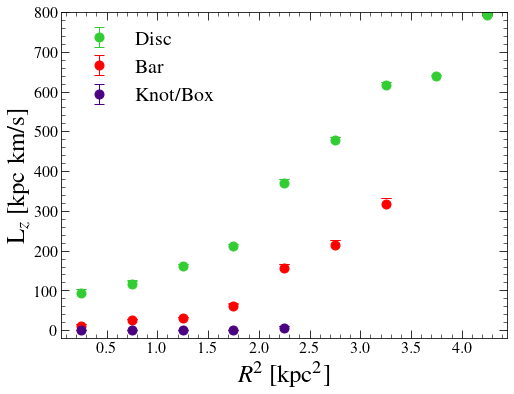

In [130]:
plt.figure(figsize=(8,6),facecolor='white')
# plt.title('Bar',fontsize=30)
plt.errorbar(data['binmin'][mask_disc]+0.25,lz[mask_disc]*-1,yerr = lz_disc_err,\
                fmt='o',markersize=9, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc')
plt.errorbar(data['binmin'][mask_bar]+0.25,lz[mask_bar]*-1,yerr = lz_bar_err,\
                fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar(data['binmin'][mask_knot]+0.25,lz[mask_knot]*-1,yerr = lz_knot_err,\
                fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot/Box')
plt.xlabel(r'$R^{2}$ [kpc$^{2}$]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
# plt.xlim(0,10)
plt.ylim(-20,800)


In [131]:
angle = 90-data['alpha']
angle_min = 90-(data['alpha']-data['alpha-'])
angle_max = 90-np.abs(data['alpha+']-data['alpha'])


(0.0, 90.0)

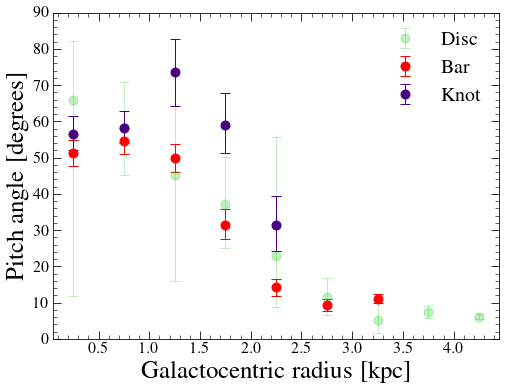

In [135]:
plt.figure(figsize=(8,6),facecolor='white')
# plt.title('Bar',fontsize=30)
plt.errorbar(data['binmin'][mask_disc]+0.25,angle[mask_disc],yerr = [angle[mask_disc]-angle_min[mask_disc],angle_max[mask_disc]-angle[mask_disc]],\
                fmt='o',markersize=9, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc',alpha=0.3)
plt.errorbar(data['binmin'][mask_bar]+0.25,angle[mask_bar],yerr = [angle[mask_bar]-angle_min[mask_bar],angle_max[mask_bar]-angle[mask_bar]],\
                fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar(data['binmin'][mask_knot]+0.25,angle[mask_knot],yerr = [angle[mask_knot]-angle_min[mask_knot],angle_max[mask_knot]-angle[mask_knot]],\
                fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot')
plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'Pitch angle [degrees]',fontsize=25)
plt.legend(loc='upper right',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
# plt.xlim(0,10)
plt.ylim(0,90)


In [333]:
def linear(xs,m,b):
    return xs*m+b

In [457]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(linear,(data['binmin'][mask_bar]+0.5)**2,lz[mask_bar]*-1) 
popt2, pcov2 = curve_fit(linear,(data['binmin'][mask_bar]+0.5)**2,lz[mask_bar]*-1+lz_max[mask_bar]) 
popt3, pcov3 = curve_fit(linear,(data['binmin'][mask_bar]+0.5)**2,lz[mask_bar]*-1+lz_min[mask_bar]) 
print(popt,popt2,popt3)
print(popt2[0]-popt[0])
print(popt[0]-popt3[0])

[ 26.12729144 -13.82217342] [ 27.08848521 -11.32814346] [ 25.08358146 -15.94648129]
0.9611937740485175
1.0437099786224024


In [489]:
print(27.08848521-26.12729144)
print(26.12729144-25.08358146)

0.9611937700000013
1.0437099799999991


In [458]:
popt_disc, pcov_disc = curve_fit(linear,(data['binmin'][mask_disc]+0.5),lz[mask_disc]*-1) 
popt2_disc, pcov2_disc = curve_fit(linear,(data['binmin'][mask_disc]+0.5),lz[mask_disc]*-1+lz_max[mask_disc]) 
popt3_disc, pcov3_disc = curve_fit(linear,(data['binmin'][mask_disc]+0.5),lz[mask_disc]*-1+lz_min[mask_disc]) 


In [469]:
# also get the derivative (i.e., the pattern speed)
popt_disc_pattern, pcov_disc_pattern = curve_fit(linear,(data['binmin'][mask_disc]+0.5)**2,lz[mask_disc]*-1) 
print(popt_disc_pattern)

[36.14722058 99.99005942]


In [460]:
print(popt_disc,popt2_disc,popt3_disc)
print(popt2_disc[0]-popt_disc[0])
print(popt_disc[0]-popt3_disc[0])

[184.6966662  -75.58611005] [183.4766613  -65.28054985] [185.77333933 -85.34445367]
-1.220004896715352
-1.0766731291618044


In [461]:
def vrot_disc(xs,vcirc, pattern):
    return vcirc+xs*pattern

In [462]:
xs_disc = np.linspace(0,5,101)
vrot = vrot_disc(xs_disc,popt_disc[0],popt_disc_pattern[0])
vrot_down = xs_disc*popt3_disc[0]
vrot_up = xs_disc*popt2_disc[0]
print(vrot)

xs_disc2 = np.linspace(5,25,200)

def eilers(xs,err=0.,err2=0.):
    return 229.0+err - (1.7+err2)*xs

vrot_eilers = eilers(xs_disc2)
vrot_eilers_up = eilers(xs_disc2,err=0.2,err2=0.1)
vrot_eilers_down = eilers(xs_disc2,err=-0.2,err2=-0.1)


[184.6966662  186.68827869 188.67989119 190.67150368 192.66311618
 194.65472867 196.64634117 198.63795366 200.62956616 202.62117865
 204.61279115 206.60440364 208.59601614 210.58762863 212.57924112
 214.57085362 216.56246611 218.55407861 220.5456911  222.5373036
 224.52891609 226.52052859 228.51214108 230.50375358 232.49536607
 234.48697857 236.47859106 238.47020355 240.46181605 242.45342854
 244.44504104 246.43665353 248.42826603 250.41987852 252.41149102
 254.40310351 256.39471601 258.3863285  260.377941   262.36955349
 264.36116598 266.35277848 268.34439097 270.33600347 272.32761596
 274.31922846 276.31084095 278.30245345 280.29406594 282.28567844
 284.27729093 286.26890343 288.26051592 290.25212841 292.24374091
 294.2353534  296.2269659  298.21857839 300.21019089 302.20180338
 304.19341588 306.18502837 308.17664087 310.16825336 312.15986586
 314.15147835 316.14309084 318.13470334 320.12631583 322.11792833
 324.10954082 326.10115332 328.09276581 330.08437831 332.0759908
 334.0676033

In [463]:
xs = np.linspace(0,13)
ys = linear(xs,popt[0],popt[1])
ys_disc = linear(xs_disc,popt_disc[0],popt_disc[1])


In [475]:
xst = np.linspace(0,13)
yst = linear(xs,40,0)


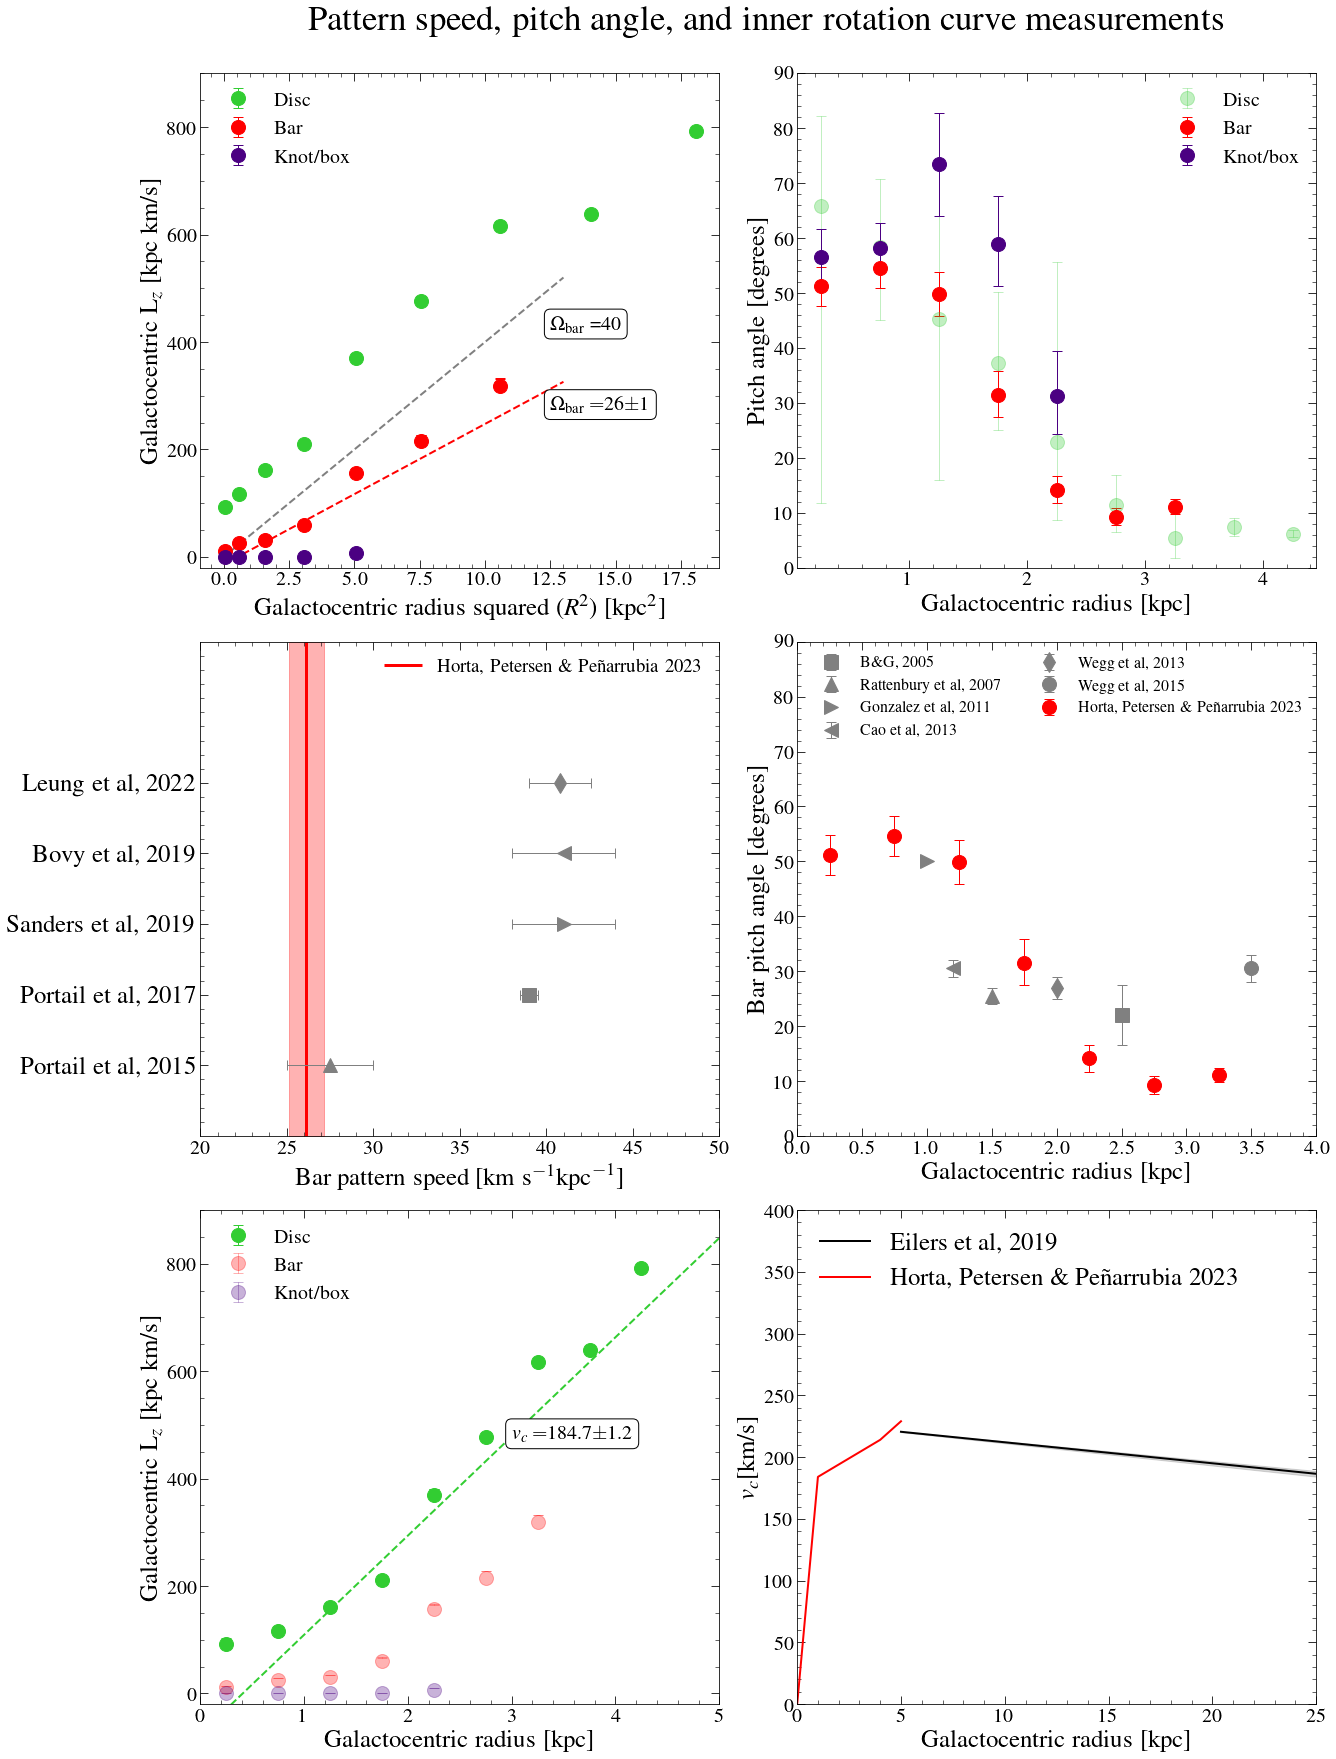

In [503]:
plt.figure(figsize=(20,30),facecolor='white',constrained_layout=True)

plt.figtext(0.2, 0.9,'Pattern speed, pitch angle, and inner rotation curve measurements',fontsize=35)
plt.subplot(3,2,1)

plt.plot(xst,yst,color='gray',ls='dashed',lw=2)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(12.5,450, r'$\Omega_{\mathrm{bar}}$ =40', fontsize=20,
        verticalalignment='top', bbox=props)
plt.errorbar((data['binmin'][mask_disc]+0.25)**2,lz[mask_disc]*-1,yerr = [lz_min[mask_disc],lz_max[mask_disc]],\
                fmt='o',markersize=14, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc')
plt.plot(xs,ys,color='r',ls='dashed',lw=2)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(12.5,300, r'$\Omega_{\mathrm{bar}} =$'+str("%.0f" % popt[0])+'$\pm1$', fontsize=20,
        verticalalignment='top', bbox=props)
plt.errorbar((data['binmin'][mask_bar]+0.25)**2,lz[mask_bar]*-1,yerr = [lz_min[mask_bar],lz_max[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar((data['binmin'][mask_knot]+0.25)**2,lz[mask_knot]*-1,yerr = [lz_min[mask_knot],lz_max[mask_knot]],\
                fmt='o',markersize=14, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot/box')
plt.xlabel(r'Galactocentric radius squared ($R^{2}$) [kpc$^{2}$]',fontsize=25)
plt.ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
# plt.xlim(0,10)
plt.ylim(-20,900)


plt.subplot(3,2,2)
plt.errorbar(data['binmin'][mask_disc]+0.25,angle[mask_disc],yerr = [angle[mask_disc]-angle_min[mask_disc],angle_max[mask_disc]-angle[mask_disc]],\
                fmt='o',markersize=14, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc',alpha=0.3)
plt.errorbar(data['binmin'][mask_bar]+0.25,angle[mask_bar],yerr = [angle[mask_bar]-angle_min[mask_bar],angle_max[mask_bar]-angle[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar(data['binmin'][mask_knot]+0.25,angle[mask_knot],yerr = [angle[mask_knot]-angle_min[mask_knot],angle_max[mask_knot]-angle[mask_knot]],\
                fmt='o',markersize=14, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot/box')
plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'Pitch angle [degrees]',fontsize=25)
plt.legend(loc='upper right',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
# plt.xlim(0,10)
plt.ylim(0,90)


plt.subplot(3,2,3)
plt.vlines(26.13,0,7,lw=3,color='r',label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023')
plt.fill_betweenx(np.linspace(0,7,8),25.13,27.13,color='r',alpha=0.3)
plt.errorbar(27.5,1, xerr =2.5,fmt='^',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(39,2, xerr =0.5,fmt='s',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(41,3, xerr =3,fmt='>',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(41,4, xerr =3,fmt='<',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(40.8,5, xerr =1.8,fmt='d',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
# plt.errorbar(29.7,6, xerr =1,fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Horta, Petersen, Pe\~{n}arrubia 2023')
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
positions = (1,2,3,4,5)
labels = ('Portail et al, 2015','Portail et al, 2017','Sanders et al, 2019','Bovy et al, 2019','Leung et al, 2022')
plt.legend(loc='upper right',fontsize=19,frameon=False,ncol=2)
plt.yticks(positions,labels,fontsize=25)
plt.xlabel(r'Bar pattern speed [km $\mathrm{s}^{-1} \mathrm{kpc}^{-1}$]',fontsize=25)
plt.ylabel('',fontsize=25)
# plt.yscale('log')
plt.ylim(0,7)
plt.xlim(20,50)


plt.subplot(3,2,4)
plt.errorbar(2.5,22, yerr =5.5,fmt='s',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='B$\&$G, 2005')
plt.errorbar(1.5,25.5, yerr =1.5,fmt='^',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Rattenbury et al, 2007')
plt.errorbar(1,50,fmt='>',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Gonzalez et al, 2011')
plt.errorbar(1.2,30.5, yerr =1.5,fmt='<',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Cao et al, 2013')
plt.errorbar(2,27, yerr =2,fmt='d',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Wegg et al, 2013')
plt.errorbar(3.5,30.5, yerr =2.5,fmt='o',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Wegg et al, 2015')
plt.errorbar(data['binmin'][mask_bar]+0.25,angle[mask_bar],yerr = [angle[mask_bar]-angle_min[mask_bar],angle_max[mask_bar]-angle[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023')

plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.legend(loc='upper right',fontsize=16,frameon=False,ncol=2)
plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'Bar pitch angle [degrees]',fontsize=25)
# plt.yscale('log')
plt.xlim(0,4)
plt.ylim(0,90)


plt.subplot(3,2,5)
plt.plot(xs_disc,ys_disc,color='limegreen',lw=2,ls='--')
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(3,500, r'$v_{c} =$'+str("%.1f" % popt_disc[0])+'$\pm$1.2', fontsize=20,
        verticalalignment='top', bbox=props)
plt.errorbar((data['binmin'][mask_disc]+0.25),lz[mask_disc]*-1,yerr = [lz_min[mask_disc],lz_max[mask_disc]],\
                fmt='o',markersize=14, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc')
plt.errorbar((data['binmin'][mask_bar]+0.25),lz[mask_bar]*-1,yerr = [lz_min[mask_bar],lz_max[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar',alpha=0.3)
plt.errorbar((data['binmin'][mask_knot]+0.25),lz[mask_knot]*-1,yerr = [lz_min[mask_knot],lz_max[mask_knot]],\
                fmt='o',markersize=14, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot/box',alpha=0.3)

plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,5)
plt.ylim(-20,900)

plt.subplot(3,2,6)
plt.plot(xs_disc2,vrot_eilers,color='k',lw=2,label='Eilers et al, 2019')
plt.fill_between(xs_disc2,vrot_eilers_down,vrot_eilers_up,color='gray',alpha=0.3)
plt.plot(np.array([0,1,2,3,4,5]),np.array([0,184,194,204,214,229]),color='r',lw=2,label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023')
# plt.fill_between(xs_disc,popt3_disc[0],popt2_disc[0],color='r',alpha=0.3)
plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'$v_{c}$[km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=25,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,25)
plt.ylim(0,400)

plt.subplots_adjust(hspace=0.15,wspace=0.15)

# plt.savefig('../plots-paper/measurements.pdf',dpi=600,fmt='pdf', rasterized=True)



In [505]:
from astropy.constants import G
from astropy import units as u
vcirc = (popt_disc[0])*(u.km/u.s)
radius = 2*u.kpc

mass = (vcirc**2*radius)/G
mass2 = mass.to(u.kg)
mass3 = mass2.to(u.Msun)
print(mass3)
print(mass3-1.3e10*u.Msun)
print((mass3-1.3e10*u.Msun)/mass3)

15863061930.046438 solMass
2863061930.046438 solMass
0.18048608412878187


In [466]:
radss = np.linspace(0,6,101)
masses_rad = np.zeros((len(radss)))
masses_rad_up = np.zeros((len(radss)))
masses_rad_down = np.zeros((len(radss)))
for indx, i in tqdm.tqdm_notebook(enumerate(radss)):
    vcirc = (popt_disc[0])*(u.km/u.s)
    vcirc_up = (popt_disc[0]-1.22)*(u.km/u.s)
    vcirc_down = (popt_disc[0]+1.22)*(u.km/u.s)
    mass1 = (vcirc**2*(i*u.kpc))/G
    mass1_up = (vcirc_up**2*(i*u.kpc))/G
    mass1_down = (vcirc_down**2*(i*u.kpc))/G
    mass2 = mass1.to(u.kg)
    mass2_up = mass1_up.to(u.kg)
    mass2_down = mass1_down.to(u.kg)
    masses_rad[indx] = np.array(mass2.to(u.Msun))
    masses_rad_up[indx] = np.array(mass2_up.to(u.Msun))
    masses_rad_down[indx] = np.array(mass2_down.to(u.Msun))
    

0it [00:00, ?it/s]

In [467]:
data['binmin']

array([0. , 0. , 0. , 0.5, 0.5, 0.5, 1. , 1. , 1. , 1.5, 1.5, 1.5, 2. ,
       2. , 2. , 2.5, 2.5, 2.5, 3. , 3. , 3. , 3.5, 3.5, 3.5, 4. , 4. ,
       4. ], dtype=float32)

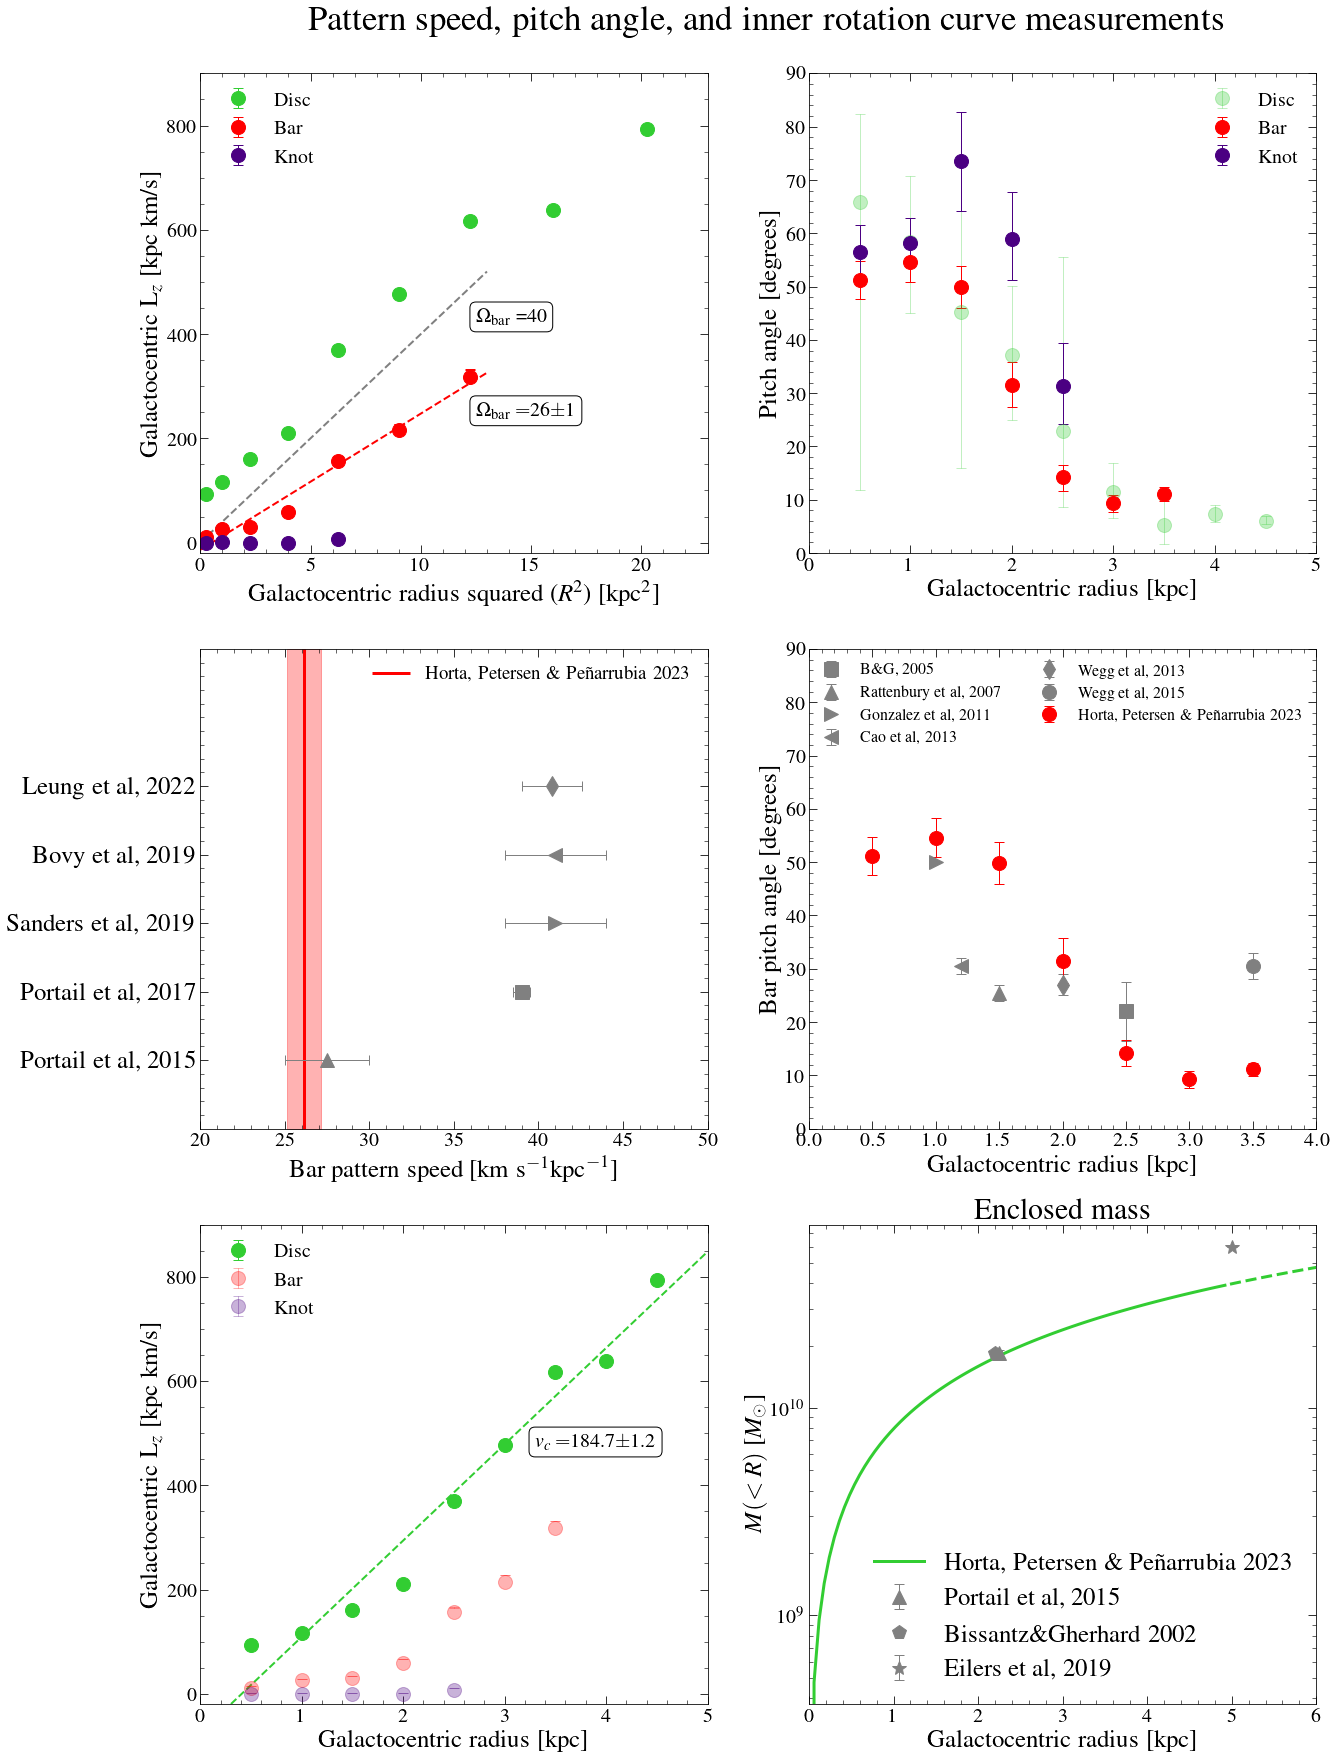

In [512]:
plt.figure(figsize=(20,30),facecolor='white',constrained_layout=True)

plt.figtext(0.2, 0.9,'Pattern speed, pitch angle, and inner rotation curve measurements',fontsize=35)
plt.subplot(3,2,1)

plt.plot(xst,yst,color='gray',ls='dashed',lw=2)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(12.5,450, r'$\Omega_{\mathrm{bar}}$ =40', fontsize=20,
        verticalalignment='top', bbox=props)
plt.errorbar((data['binmin'][mask_disc]+0.5)**2,lz[mask_disc]*-1,yerr = [lz_min[mask_disc],lz_max[mask_disc]],\
                fmt='o',markersize=14, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc')
plt.plot(xs,ys,color='r',ls='dashed',lw=2)
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(12.5,270, r'$\Omega_{\mathrm{bar}} =$'+str("%.0f" % popt[0])+'$\pm1$', fontsize=20,
        verticalalignment='top', bbox=props)
plt.errorbar((data['binmin'][mask_bar]+0.5)**2,lz[mask_bar]*-1,yerr = [lz_min[mask_bar],lz_max[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar((data['binmin'][mask_knot]+0.5)**2,lz[mask_knot]*-1,yerr = [lz_min[mask_knot],lz_max[mask_knot]],\
                fmt='o',markersize=14, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot')
plt.xlabel(r'Galactocentric radius squared ($R^{2}$) [kpc$^{2}$]',fontsize=25)
plt.ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,23)
plt.ylim(-20,900)


plt.subplot(3,2,2)
plt.errorbar(data['binmin'][mask_disc]+0.5,angle[mask_disc],yerr = [angle[mask_disc]-angle_min[mask_disc],angle_max[mask_disc]-angle[mask_disc]],\
                fmt='o',markersize=14, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc',alpha=0.3)
plt.errorbar(data['binmin'][mask_bar]+0.5,angle[mask_bar],yerr = [angle[mask_bar]-angle_min[mask_bar],angle_max[mask_bar]-angle[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar(data['binmin'][mask_knot]+0.5,angle[mask_knot],yerr = [angle[mask_knot]-angle_min[mask_knot],angle_max[mask_knot]-angle[mask_knot]],\
                fmt='o',markersize=14, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot')
plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'Pitch angle [degrees]',fontsize=25)
plt.legend(loc='upper right',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,5)
plt.ylim(0,90)


plt.subplot(3,2,3)
plt.vlines(26.13,0,7,lw=3,color='r',label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023')
plt.fill_betweenx(np.linspace(0,7,8),25.13,27.13,color='r',alpha=0.3)
plt.errorbar(27.5,1, xerr =2.5,fmt='^',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(39,2, xerr =0.5,fmt='s',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(41,3, xerr =3,fmt='>',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(41,4, xerr =3,fmt='<',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
plt.errorbar(40.8,5, xerr =1.8,fmt='d',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5)
# plt.errorbar(29.7,6, xerr =1,fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Horta, Petersen, Pe\~{n}arrubia 2023')
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
positions = (1,2,3,4,5)
labels = ('Portail et al, 2015','Portail et al, 2017','Sanders et al, 2019','Bovy et al, 2019','Leung et al, 2022')
plt.legend(loc='upper right',fontsize=19,frameon=False,ncol=2)
plt.yticks(positions,labels,fontsize=25)
plt.xlabel(r'Bar pattern speed [km $\mathrm{s}^{-1} \mathrm{kpc}^{-1}$]',fontsize=25)
plt.ylabel('',fontsize=25)
# plt.yscale('log')
plt.ylim(0,7)
plt.xlim(20,50)


plt.subplot(3,2,4)
plt.errorbar(2.5,22, yerr =5.5,fmt='s',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='B$\&$G, 2005')
plt.errorbar(1.5,25.5, yerr =1.5,fmt='^',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Rattenbury et al, 2007')
plt.errorbar(1,50,fmt='>',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Gonzalez et al, 2011')
plt.errorbar(1.2,30.5, yerr =1.5,fmt='<',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Cao et al, 2013')
plt.errorbar(2,27, yerr =2,fmt='d',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Wegg et al, 2013')
plt.errorbar(3.5,30.5, yerr =2.5,fmt='o',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5,label='Wegg et al, 2015')
# plt.errorbar(data['binmin'][mask_bar][:3]+0.5,angle[mask_bar][:3],yerr = [angle[mask_bar][:3]-angle_min[mask_bar][:3],angle_max[mask_bar][:3]-angle[mask_bar][:3]],\
#                 fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023',alpha=0.3)
# plt.errorbar(data['binmin'][mask_bar][3:]+0.5,angle[mask_bar][3:],yerr = [angle[mask_bar][3:]-angle_min[mask_bar][3:],angle_max[mask_bar][3:]-angle[mask_bar][3:]],\
#                 fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023')
plt.errorbar(data['binmin'][mask_bar]+0.5,angle[mask_bar],yerr = [angle[mask_bar]-angle_min[mask_bar],angle_max[mask_bar]-angle[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023')

plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.legend(loc='upper right',fontsize=16,frameon=False,ncol=2)
plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'Bar pitch angle [degrees]',fontsize=25)
# plt.yscale('log')
plt.xlim(0,4)
plt.ylim(0,90)


plt.subplot(3,2,5)
plt.plot(xs_disc,ys_disc,color='limegreen',lw=2,ls='--')
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(3.3,500, r'$v_{c} =$'+str("%.1f" % popt_disc[0])+'$\pm$1.2', fontsize=20,
        verticalalignment='top', bbox=props)
plt.errorbar((data['binmin'][mask_disc]+0.5),lz[mask_disc]*-1,yerr = [lz_min[mask_disc],lz_max[mask_disc]],\
                fmt='o',markersize=14, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc')
plt.errorbar((data['binmin'][mask_bar]+0.5),lz[mask_bar]*-1,yerr = [lz_min[mask_bar],lz_max[mask_bar]],\
                fmt='o',markersize=14, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar',alpha=0.3)
plt.errorbar((data['binmin'][mask_knot]+0.5),lz[mask_knot]*-1,yerr = [lz_min[mask_knot],lz_max[mask_knot]],\
                fmt='o',markersize=14, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot',alpha=0.3)

plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,5)
plt.ylim(-20,900)

plt.subplot(3,2,6)
plt.title('Enclosed mass',fontsize=30)
plt.errorbar(2.25,1.84e10, yerr =0.07e10,fmt='^',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5, label='Portail et al, 2015')
plt.errorbar(2.2,1.85e10,fmt='p',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5, label='Bissantz$\&$Gherhard 2002')
plt.errorbar(5,6e10,yerr=0.01e10,fmt='*',markersize=14, color='gray',ecolor='gray', elinewidth=1, capsize=5, label='Eilers et al, 2019')
plt.plot(radss[:-18],masses_rad[:-18],lw=3,color='limegreen',label='Horta, Petersen $\&$ Pe\~{n}arrubia 2023')
plt.plot(radss[-18:],masses_rad[-18:],lw=3,ls='--',color='limegreen')
plt.xlabel(r'Galactocentric radius [kpc]',fontsize=25)
plt.ylabel(r'$M (<R)$ [$M_{\odot}$]',fontsize=25)
plt.legend(loc='lower right',fontsize=25,frameon=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.yscale('log')
plt.xlim(0,6)
# plt.ylim(0,400)

plt.subplots_adjust(hspace=0.2,wspace=0.2)

# plt.savefig('../plots-paper/measurements.pdf',dpi=600,fmt='pdf', rasterized=True)



# Use the centroid values, not the mean of the stars

In [ ]:
bar_lz_mean = np.array([])
bar_lz_up = np.array([])
bar_lz_down = np.array([])






In [ ]:
plt.errorbar(data['binmin'][mask_bar]+0.25,lz[mask_bar]*-1,yerr = [lz_min[mask_bar],lz_max[mask_bar]],\
                fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')


In [204]:
patspeed = lz[mask_bar]*-1/((data['binmin'][mask_bar]+0.25)**2)
patspeed_up = (lz[mask_bar]*-1+lz_max[mask_bar])/((data['binmin'][mask_bar]+0.25)**2)
patspeed_down = (lz[mask_bar]*-1+lz_min[mask_bar])/((data['binmin'][mask_bar]+0.25)**2)
print(np.nanmean(patspeed[1:]))
print(np.nanmean(patspeed_up[1:]))
print(np.nanmean(patspeed_down[1:]))


28.989328
31.415213
26.647696


In [194]:
lz[mask_bar]*-1

array([ 11.7,  25.5,  30.6,  59.6, 156.7, 215.3, 318.3], dtype=float32)

In [87]:
print(len(knot_angle_mean))

4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 90.0)

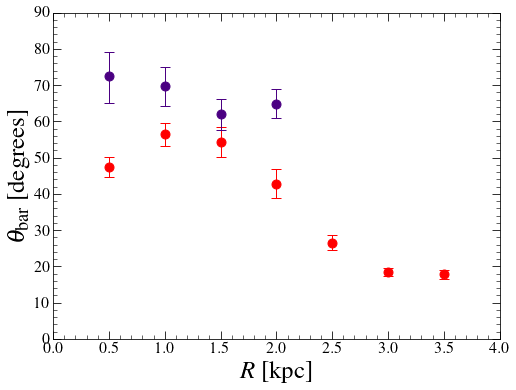

In [90]:
# bar_angle_mean = np.array([76.9,76.5,74., 69.5,74.4,73.6])
# bar_angle_up = np.array([7.4,3.5,2.0,2.1,0.6,0.9])
# bar_angle_down = np.array([6.6,3.6,2.0,2.1,0.6,0.9])
bar_angle_mean = np.array([42.7,33.6,35.6, 47.3,63.5,71.6,72.2])
bar_angle_up = np.array([2.7,3.1,4.3,3.9,1.9,1.1,1.3])
bar_angle_down = np.array([2.8,3.,4.1,4.1,2.,1.1,1.2])

knot_angle_mean = np.array([17.6,20.2,28.1,25.1])
knot_angle_up = np.array([7.3,5.7,4.4,4.1])
knot_angle_down = np.array([6.6,5.3,4.2,3.9])




plt.figure(figsize=(8,6),facecolor='white')
# plt.title('Bar',fontsize=30)
plt.errorbar(np.array([0.5,1.,1.5,2.,2.5,3.,3.5]),90-bar_angle_mean,yerr = [bar_angle_up,bar_angle_down],fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5)
plt.errorbar(np.array([0.5,1.,1.5,2.]),90-knot_angle_mean,yerr = [knot_angle_up,knot_angle_down],fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5)
plt.xlabel(r'$R$ [kpc]',fontsize=25)
plt.ylabel(r'$\theta_{\mathrm{bar}}$ [degrees]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,4)
plt.ylim(0,90)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


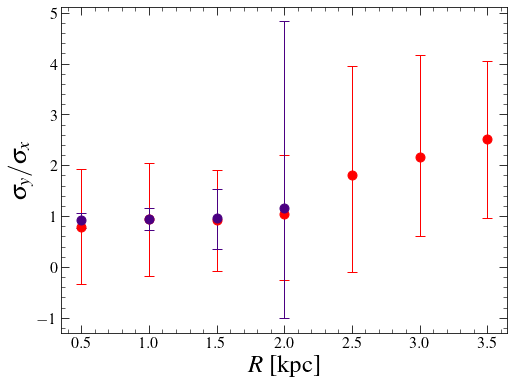

In [94]:
# bar_angle_mean = np.array([76.9,76.5,74., 69.5,74.4,73.6])
# bar_angle_up = np.array([7.4,3.5,2.0,2.1,0.6,0.9])
# bar_angle_down = np.array([6.6,3.6,2.0,2.1,0.6,0.9])
bar_sigmasx_mean = np.array([49.2,49.7,59.3,63.3,56.1,85.5,78.3])
bar_sigmasx_up = np.array([2.3,2.4,3.4,3.5,2.3,1.8,3.2])
bar_sigmasx_down = np.array([2.3,2.3,3.4,3.5,1.9,1.5,3.0])

knot_sigmasx_mean = np.array([10.9,10.6,10.9,10.4])
knot_sigmasx_up = np.array([1.3,0.9,1.3,0.6])
knot_sigmasx_down = np.array([0.7,0.5,0.7,0.3])

bar_sigmasy_mean = np.array([38.8,47.3,55.0,65.6,101.2,184.7,197.1])
bar_sigmasy_up = np.array([2.6,2.7,3.4,4.5,4.4,2.8,5.0])
bar_sigmasy_down = np.array([2.6,2.5,3.3,4.1,4.1,3.0,4.6])


knot_sigmasy_mean = np.array([10.1,10.1,10.5,12.1])
knot_sigmasy_up = np.array([0.2,0.2,0.8,1.3])
knot_sigmasy_down = np.array([0.1,0.1,0.4,1.1])

rat_mean_bar = bar_sigmasy_mean/bar_sigmasx_mean
rat_up_bar = bar_sigmasy_up/bar_sigmasx_up
rat_low_bar = bar_sigmasy_down/bar_sigmasx_down

rat_mean_knot = knot_sigmasy_mean/knot_sigmasx_mean
rat_up_knot = knot_sigmasy_up/knot_sigmasx_up
rat_low_knot = knot_sigmasy_down/knot_sigmasx_down

plt.figure(figsize=(8,6),facecolor='white')
# plt.title('Bar',fontsize=30)
plt.errorbar(np.array([0.5,1.,1.5,2.,2.5,3.,3.5]),rat_mean_bar,yerr = [rat_up_bar,rat_low_bar],fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5)
plt.errorbar(np.array([0.5,1.,1.5,2.]),rat_mean_knot,yerr = [rat_up_knot,rat_low_knot],fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5)
plt.xlabel(r'$R$ [kpc]',fontsize=25)
plt.ylabel(r'$\sigma_{y}/\sigma_{x}$',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
# plt.xlim(0,4)
# plt.ylim(0,90)

